# TPC1 - Teoria de Probabilidades

## Atenção:

• Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio.

• Deve entregar ESTE Notebook de Jupyter.

• O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual.

• Não deve acrescentar ou apagar nenhuma célula.

• Todas as explicações devem ser claras e concisas.

• É preferível fazer menos e fazer bem que muito e mal.

• O pacote $\texttt{numba}$ pode diminuir o tempo de cálculo.

• A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.

### Exercicio 1: Gerador de números aleatórios
Considere a distribuição de probabilidade dada pela distribuição,
\begin{equation}
\rho(x)=\frac{e^{-\left(\frac{x}{\sigma}\right)^{4}}}{C(\sigma)}
\end{equation}
onde x é uma variável aleatória real. Esta distribuição não tem uma cumulativa fácil de obter pelo que se torna impossível utilizar o método de inversão para gerar amostras aleatórias com $\rho$. Por este motivo, iremos utilizar o método de von Neumann (VN) para gerar amostras aleatórias. Como é possivel ajustar a escala de um gerador de números aleatórios através de uma operação simples, $x=\sigma x'$, podemos escolher $\sigma=1$. 

1. Este método utiliza propostas uniformes, $E(x)$,num intervalo entre $[-\Delta/2,\Delta/2]$ para serem aceites no algoritmo de VN.

In [2]:
# Importe os Módulos Necessários

import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from scipy.integrate import quad


%matplotlib inline

(a) Escreva a expressão analítica da probabilidade de aceitação para cada $x$, $P(A|x)$ de modo a maximizar as aceitações.

Responda Aqui

A probabilidade de aceitação para um dado $x$ pode ser expressa por

$$
\begin{align}
P(A|x) &= \frac{\rho(x)}{E(x)}C
\end{align}
$$

onde $E(x)$ representa a probabilidade de escolha de uma proposta definida no intervalo $\left[-\Delta/2, \Delta/2  \right]$. Como esta escolha é uniforme, podemos subtituir por $1/\Delta$. Substituindo, temos

$$
\begin{align}
P(A|x) &= \Delta \frac{e^{-\left(\frac{x}{\sigma}\right)^{4}}}{C(\sigma)} C
\end{align}
$$

em que $C(\sigma)$ corresponde à constante de normalização da distribuição $\rho(x)$.


De modo a maximizar as aceitações, a constante $C$ deve ser 

$$
C = \frac{1}{max \left(\frac{\rho(x)}{E(x)}\right)}
$$

Desta forma, a expressão fica 

$$
\begin{align}
P(A|x) &=  e^{-\left(\frac{x}{\sigma}\right)^{4}}
\end{align}
$$



(b) Escreva uma função que gera $M$ eventos aleatórios com a distribuição $\rho$ utilizando esta proposta.

Responda Aqui

In [8]:
# Responda Aqui

def Integrand_NormConst(x):                               # Definir função integranda para determinar a constante de normalização
  return np.exp(-(x**4))

y = np.vectorize(Integrand_NormConst,otypes = [float])

def Csigma():                                             
  Int = quad(y, -10, 10)
  return Int[0]

def vonNeumann(M, delta):                                # Função que gera M eventos aleatórios com a distribuição p

    final = np.array([])
    N = 0
    Na = 0

    while(final.size < M):

        x = delta*(rd.random_sample(M) - 0.5)                    
        results, = np.where(rd.random_sample(M) < np.exp(-(x**4)))  

        N += len(x)
        Na += len(results,)

        results = x[results,]                                         

        final = np.concatenate((final,results))     

    PA = (Na/N)

    # print(f"O número de propostas aceites corresponde a {PA*100} % das propostas totais para delta igual a {delta}")                   

    return final[0:M], PA
    
print('O valor da constante de normalização é',Csigma())

Norm_Const = Csigma()

O valor da constante de normalização é 1.8128049541109539


(c) Compare o estimador da densidade de probabilidade de uma amostra quando se utiliza $\Delta=0.5,1.0,2.0\,\text{e}\,4.0$. Comente os resultados observados. 

Responda Aqui

É possível observar que quanto maio for o valor de $\Delta$, maior é a área da distribuição $\rho(x)$ compreendida pela função uniforme de escolha. Como consequência, são propostos cada vez mais pontos pertencentes à distribuição, melhorando a qualidade do gerador.

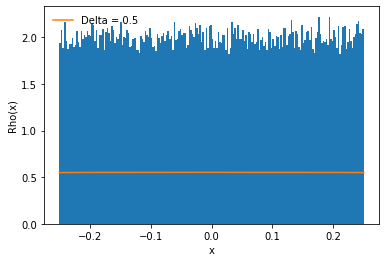

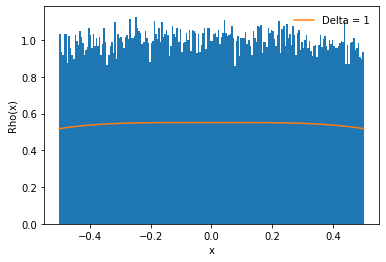

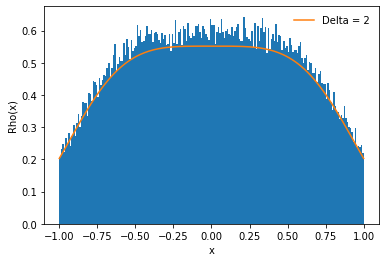

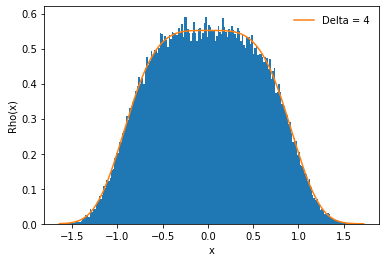

In [ ]:
# Responda Aqui

delta = [.5, 1, 2, 4]

for d in delta:

  bins = plt.hist(vonNeumann(100000,d)[0],200, density=True, stacked=True)[1]

  plt.plot(bins, np.exp(-((bins)**4))/Norm_Const, label = 'Delta = {}'.format(d))
  plt.legend(frameon=False,fontsize=10)
  plt.xlabel("x")
  plt.ylabel("Rho(x)")
  plt.show()


(d) Para aferirmos a qualidade do nosso gerador podemos representar como função de $0.2<\Delta<10.$, as quantidades, 
\begin{align}
\left\langle \frac{e^{x^{4}-\frac{x^{2}}{2}}}{\sqrt{2\pi}}\right\rangle _{\rho}	&= \int dx\rho(x)\frac{e^{x^{4}-\frac{x^{2}}{2}}}{\sqrt{2\pi}}\approx\frac{1}{M}\sum_{n=1}^{M}\frac{e^{x_{n}^{4}-\frac{x_{n}^{2}}{2}}}{\sqrt{2\pi}}\\
P(A)	& =\int P(A|x)E(x)dx\approx\frac{N_{\text{A}}}{N}
\end{align}
onde $N_{A}$ é o número de propostas aceites entre $N$ . Comente os resultados. Qual será o valor da constante $C(1)$? 

Responda Aqui

A probabilidade de aceitação descresce com o aumento do valor de $\Delta$ porque, apesar da área da distribuição $\rho(x)$ compreendida pela função de escolha $E(x)$ ser cada vez maior, também aumentam as zonas que são compreendidas pela função de escolha mas que não pertencem à distribuição. Como a probabilidade de aceitação depende da razão $\rho(x)/E(x)$, quanto maior é função de escolha relativamente à distribuição, menor será a aceitação.


A estimativa da média parece oscilar bastante para valores de $\Delta$ superiores a $4$. A partir deste valor, a probabilidade de aceitação cai para valores inferiores a $0.4$, o que sugere uma queda na qualidade do gerador.

[Text(0, 0.5, 'Estimativa da média'), Text(0.5, 0, '$\\Delta$')]

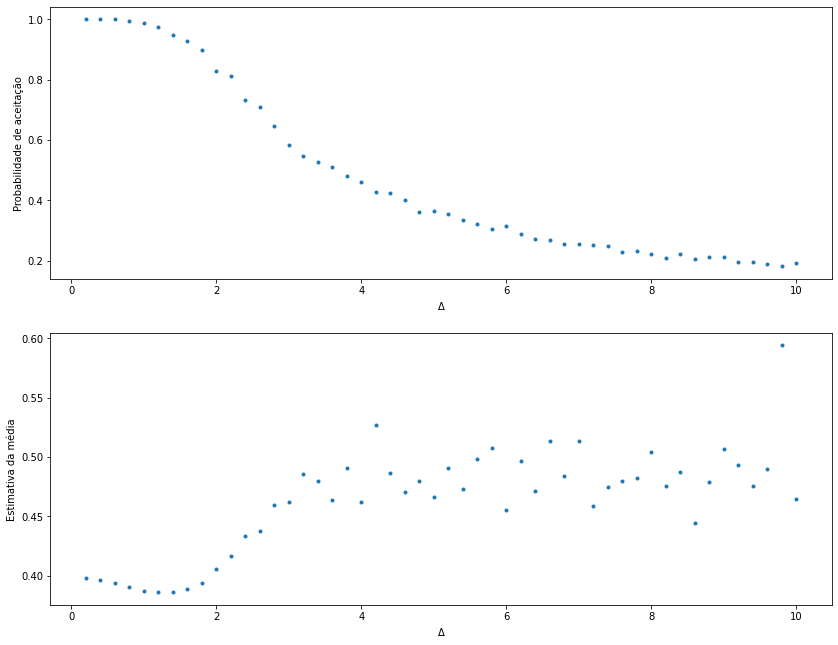

In [ ]:
# Responda Aqui

deltas = np.linspace(.2, 10, 50)
M = 1000
PA_values = []
Avg_values = []



for d in deltas:

  Sum = 0
  x_values, PA = vonNeumann(M, d)

  PA_values.append(PA)

  for x in x_values: 
    Sum += (np.exp(x**4 - (x**2)/2)) * (1/np.sqrt(2*np.pi))

  Avg = Sum/M
  Avg_values.append(Avg)






fig,  [figT, figD] = plt.subplots(2, 1, constrained_layout=False, figsize=(14,11))

figT.plot(deltas, PA_values, '.')
figT.set(xlabel="$\Delta$", ylabel="Probabilidade de aceitação")

figD.plot(deltas, Avg_values, '.')
figD.set(xlabel="$\Delta$", ylabel="Estimativa da média")



2. Este método utiliza propostas exponenciais, $E(x)$,em $\mathbb{R}$ com a distribuição 
\begin{equation}
E(x)=\frac{e^{-\frac{|x|}{\lambda}}}{2\lambda}.
\end{equation}
(a) Escreva a expressão analítica da probabilidade de aceitação para cada $x$, $P(A|x)$ de modo a maximizar as aceitações.

Responda Aqui

Através de um processo análogo ao da questão anterior, chegamos a 

$$
P(A|x) = e^{-x^4 + \frac{\left | x \right |}{\lambda} + c}
$$

onde $c$ é uma constante obtida de forma a maximizar as aceitações  e equivale a 

$$
c = -\left(\frac{1}{4\lambda} \right)^{\frac{4}{3}} + \frac{1}{\lambda}\left( \frac{1}{4\lambda}\right)^{\frac{1}{3}}
$$

(b) Escreva uma função que gera $M$ eventos aleatórios com a distribuição $\rho$ utilizando esta proposta.

Responda Aqui

In [ ]:
# Responda Aqui

def vonNeumann2(M, lamb):

    final = np.array([])
    N = 0
    Na = 0
    Lim = 10
    c =   (1/(4*lamb)**(4/3)) - (1/lamb)*(1/(4*lamb)**(1/3))


    while(final.size < M):

        x = 0.5 * np.random.exponential(1/lamb, size=M)              
        results, = np.where(rd.random_sample(M) < np.exp(-(x**4) - (1/lamb)*x + c))

        N += len(x)
        Na += len(results,)

        results = x[results,]

        final = np.concatenate((final,results))     

    PA = (Na/N)

    # print(f"O número de propostas aceites corresponde a {PA*100} % das propostas totais para delta igual a {lamb}")                   
    return final[0:M], PA


(c) Compare o estimador da densidade de probabilidade de uma amostra quando se utiliza $\lambda=2$.

Responda Aqui

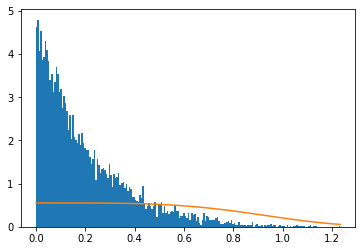

In [ ]:
# Responda Aqui

lamb = 2

n, bins, patches = plt.hist(vonNeumann2(10000,lamb)[0],200, density=True, stacked=True)
plt.plot(bins,np.exp(-((bins)**4))/Csigma())

(d) Para aferirmos a qualidade do nosso gerador podemos representar as grandezas propostas na pergunta anterior como função de $0.1<\lambda<10$. Comente os resultados obtidos e compare com o procedimento da pergunta anterior. 

Responda Aqui

Diferente da pergunta anterior, a probabilidade de aceitação aumenta com o parâmetro variado. Desta vez, ao aumentar o valor de $\lambda$, a função de escolha é achatada, de forma que compreende quase que inteiramente a distribuição. Por outras palavras, qualquer ponto escolhido no interior da função de escolha vai ter uma probabilidade cada vez maior de também pertencer à distribuição. 

Para valores de $\lambda$ inferiores a $2$, a função de escolha, apesar de compreender a distribuição por completo, ainda compreende muitos pontos que não pertencem à distribuição, pelo que a probabilidade de aceitação é baixa e, consequentemente, a perfomance do gerador é ineficiente. Quando calculamos a estimativa da média para estes valores, vemos que esta oscila bastante pois os números gerados não se encaixam perfeitamente na distribuição pretendida. 

[Text(0, 0.5, 'Estimativa da média'), Text(0.5, 0, '$\\lambda$')]

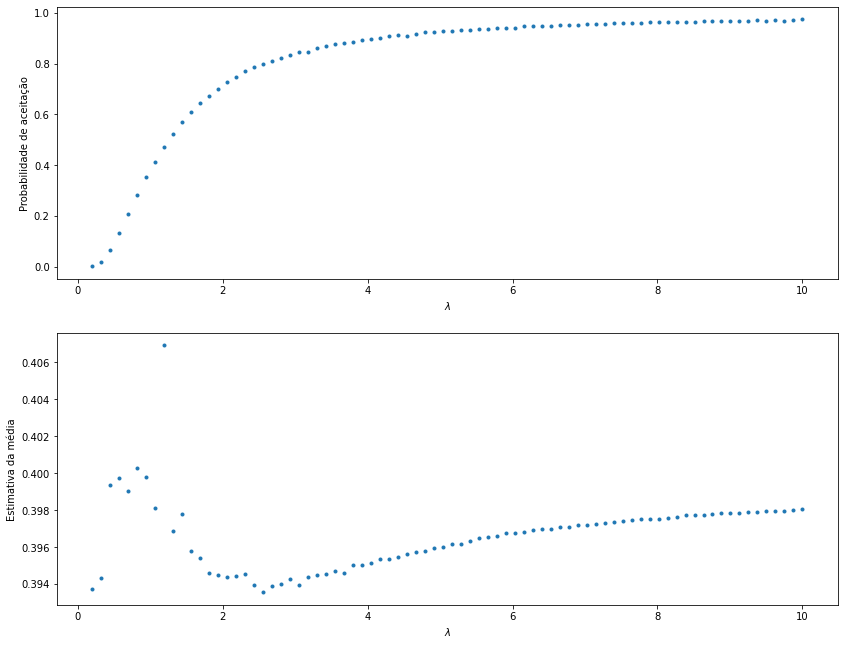

In [ ]:
# Responda Aqui

lambdas = np.linspace(.2, 10, 80)
M = 10000
PA_values = []
Avg_values = []


for l in lambdas:

  Sum = 0
  x_values, PA = vonNeumann2(M, l)
  PA_values.append(PA)

  for x in x_values: 
    Sum += (np.exp(x**4 - (x**2)/2)) * (1/np.sqrt(2*np.pi))

  Avg = Sum/M
  Avg_values.append(Avg)




fig,  [figT, figD] = plt.subplots(2, 1, constrained_layout=False, figsize=(14,11))

figT.plot(lambdas, PA_values, '.')
figT.set(xlabel="$\lambda$", ylabel="Probabilidade de aceitação")

figD.plot(lambdas, Avg_values, '.')
figD.set(xlabel="$\lambda$", ylabel="Estimativa da média")

### Exercicio 2: Amostragem por importância
Considere o valor médio,$\mu(a)=\left\langle e^{-ax}\right\rangle _{\rho}$,podemos obter uma estimativa para este valor médio gerando uma amostra de $M$ variáveis aleatórias geradas com $\rho(x)$. 

1. Escreva uma função que avalie o estimador da média com $M$ valores, $\mu(a,M)$.

Responda Aqui

In [ ]:
# Responda Aqui

def EstimatedMean(a, M):
  sum = 0 
  x = vonNeumann(M, 2)[0]

  for i in range(len(x)):
    sum += (np.exp(-a*x[i])-sum)/(i+1)

  return sum

a = 1
print("A estimativa da média é", EstimatedMean(a, 1000), "para a =", a)

A estimativa da média é 1.1447127115646059 para a = 1


2. A função anterior devolve um resultado aleatório, $\mu_{k}(a,M)$. Para caracterizar a dispersão desta variável, medimos desvio padrão de $K$ de medidas, 
\begin{align}
\overline{\mu(a,M)}	&= \frac{1}{K}\sum_{k=1}^{K}\mu_{k}(a,M)\\
\overline{\mu^{2}(a,M)}	&=\frac{1}{K}\sum_{k=1}^{K}\mu_{k}^{2}(a,M)\\
\sigma	&=\sqrt{\frac{K}{K-1}\left(\overline{\mu^{2}(a,M)}-\overline{\mu(a,M)}^{2}\right)}
\end{align}
Represente a estimativa do desvio padrão para $a=1$ como função de $M$ para valores $M=1,2,4,8,16,32,64,128,256,512$ e $1024$. Qual é a dependência em $M$ que observa? Comente os resultados obtidos.

Responda Aqui

Quanto mais pontos $M$ são utilizados para calcular o estimador $\mu_{k}$ da média, menos dispersos os resultados vão estar entre si, o que equivale dizer que o seu desvio padrão é cada vez menor, de forma que estão cada vez mais próximos da média real. 

Este comportamento pode ser observado também no gráfico, onde para $M$ pequeno o desvio padrão é muito alto, decrescendo exponencialmente com o aumento de $M$.




Text(0, 0.5, 'Desvio Padrão')

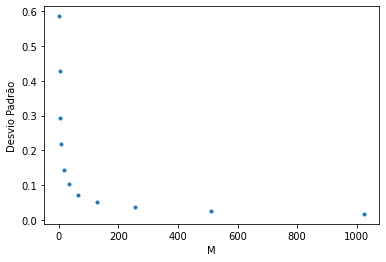

In [ ]:
# Responda Aqui

def StandardDev(a,K,M):

  std_dev = []
  mu = 0
  mu_sq = 0

  for k in range(K):

    s = EstimatedMean(a,M)
    mu += s / K
    mu_sq += s**2 / K

    sigma = np.sqrt((K/(K-1)) * (mu_sq - mu**2))

  return sigma

M = [1,2,4,8,16,32,64,128,256,512,1024]


plt.plot(M, [StandardDev(1,1000,m) for m in M], ".")
#plt.plot(M,StandardDev(1,100,1))
plt.xlabel("M")
plt.ylabel("Desvio Padrão")



3. Escolhendo $M=8192$, represente oito curvas de $\mu_{k}(a,M)$ como função de $a$ no intervalo $[1,64]$ o que observa? Como interpreta os resultados?

Responda Aqui

In [ ]:
# Responda Aqui

## Exercicio 3: Volume da esfera:

Em Física Estatística Clássica é fundamental calcular o volume de da hiperesfera em $D$ dimensões. Podemos estimar este volume através de um procedimento estocástico gerando pontos neste espaço a $D$ dimensões utilizando a distribuição $\rho(x)$ em cada coordenada. Nesta formulação cada ponto é gerado com a distribuição:
\begin{equation}
\rho(x_{1},\dots,x_{D})=\prod_{n=1}^{D}\rho(x_{n})
\end{equation}
O volume da hiperesfera pode ser obtido através do cáculo de uma média,
\begin{equation}
V_{D}=\left\langle f\right\rangle _{\rho}.
\end{equation}
1. Determine a função $f(x_{1},\dots,x_{D})$.

Responda Aqui

Seja uma função $\rho: [0,1]^{D} \rightarrow (0,\infty)$ com $\int_{[0,1]^{D} }^{}\rho dx = 1$

$$
V_{D} = \int_{[0,1]^{D}}^{} \chi_{S}(x) dx = \int_{[0,1]^{D}}^{} \rho \cdot  \frac{\chi_{S}(x)}{\rho} \approx \frac{1}{N} \sum_{i=1}^{N} \frac{\chi_{S}(x_{i})}{\rho(x_{i})}
$$

em que os pontos $x_{i} = (x_{1},...,x_{D})$ estão distribuídos com densidade $\rho$ e a função $\chi_{S}$ é função indicadora tal que se $x_{1}^2 + ... + x_{D}^2 \leq  1 $ é $1$ e $0$ caso contrário.

Portanto,

$$
f(x_{1},...,x_{D}) =  \frac{\chi_{S}(x_{1},...,x_{D})}{\rho(x_{1},...,x_{D})}
$$



In [ ]:
# Responda Aqui

2. Estime o volume usando este processo e compare com o resultado analítico,
\begin{equation}
V_{D}(R)	=R^{D}\begin{cases}
\frac{\pi^{D/2}}{(D/2)!} & D\:\text{par}\\
\frac{2\left(\frac{D-1}{2}!\right)(4\pi)^{\frac{D-1}{2}}}{D!} & D\,\text{impar}
\end{cases}
\end{equation}
representando o $\ln(V_{D}(1))$ como função de $D$. Estime o erro de cada medida e represente no gráfico com barras de erro.

Responda Aqui

In [14]:
# Responda Aqui

def f_aux(x):
    return x * x

def f(f_aux, R, num_dimen, N=100):


  Xss = []
  rho_val = []

  volume = (2 * R) ** num_dimen
  xs = np.zeros((num_dimen, N))             # Definir N pontos no domínio para cada uma das dimensões 
  
  for i in range(num_dimen):
    #xs[i] = vonNeumann(1000, 4)    
    xs[i] = R * np.random.rand(N)           # Gerar um domínio a partir de uma distribuição uniforme

  for j in range(N):                        # Percorrer a enésima coordenada
    sum = 0
    x = []
    rho = 1

    for i in range(num_dimen):
      comp = xs[i][j]
      x.append(comp)             
      sum += f_aux(comp)

    if sum <= R ** 2:                    # Verificar se a coordenada escolhida se encontra no interior da esfera 
        Xs = 1 
    else:
        Xs = 0


    for k in x:
      s = np.exp(-((k)**4))/Norm_Const   # Calcular o valor da distribuição na coordenada através do produtório
      rho *= s
      rho_val.append(rho)

    rho_val.append(rho)
    Xss.append(Xs)



  return rho_val, Xss


def VolumeFromMean(f_aux, R, num_dimen, N=100000):
  sum = 0 
  rho_val, Xss = f(f_aux, R, num_dimen, N=100000)

  for i in range(N):
   sum += (Xss[i]/rho_val[i]-sum)/(i+1)

  return sum


def VolumeAnalyticalResult(R, D):
  if D % 2 == 0:
    vd = R ** D * (np.pi**(D/2)/np.math.factorial(D/2))
  else:
    vd = R ** D * ((2 * np.math.factorial((D-1)/2) * (4 * np.pi)**((D-1)/2))/np.math.factorial(D))
  return vd

D = 3

print(f"Para R = 1, o volume de uma híperesfera com {D} dimensões é dado, analiticamente, por {VolumeAnalyticalResult(1,D)} e através da média por {VolumeFromMean(f_aux, 1, D, 10)}")



Para R = 1, o volume de uma híperesfera com 3 dimensões é dado, analiticamente, por 4.1887902047863905 e através da média por 3.0299492993227615


3. Será que este procedimento é melhor que uma integração do volume usando a regra do trapézio? Será que o benefício depende da dimensionalidade? 

Responda Aqui

In [ ]:
# Responda Aqui

### Bom Trabalho